In [3]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn import metrics # performance evaluation


In [4]:
#import Data
df_cancer = pd.read_csv('./data/Breast_cancer_data.csv')
df_cancer.sample(10)

# 0 means bening and 1 means malgnant 

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
147,14.950,18.77,97.84,689.5,0.08138,1
447,14.800,17.66,95.88,674.8,0.09179,1
140,9.738,11.97,61.24,288.5,0.09250,1
203,13.810,23.75,91.56,597.8,0.13230,0
433,18.820,21.97,123.70,1110.0,0.10180,0
130,12.190,13.29,79.08,455.8,0.10660,1
558,14.590,22.68,96.39,657.1,0.08473,1
10,16.020,23.24,102.70,797.8,0.08206,0
396,13.510,18.89,88.10,558.1,0.10590,1
527,12.340,12.27,78.94,468.5,0.09003,1


In [5]:
#count number of diagnosed for cancer and not check the total df_cancer.shape
df_cancer[df_cancer['diagnosis']==0].count() # benign 


mean_radius        212
mean_texture       212
mean_perimeter     212
mean_area          212
mean_smoothness    212
diagnosis          212
dtype: int64

In [6]:
df_cancer[df_cancer['diagnosis']==1].count() # malignant

mean_radius        357
mean_texture       357
mean_perimeter     357
mean_area          357
mean_smoothness    357
diagnosis          357
dtype: int64

<h1> Handling of Missing/Categorical Data</h1>

In [7]:
#check how many values are missing (NaN)

df_cancer.isnull().sum()

#handling categorical data
# if you were provided the diagnosis as benign and malignant 
#df_cancer['diagnosis'] = df_cancer['diagnosis'].map({'benign':0,'malignant':1})
#df_cancer.head()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

<h1>Visualize diagnos column
</h1>

Text(0.5, 1.0, 'number of Benign_0 vs Malignan_1')

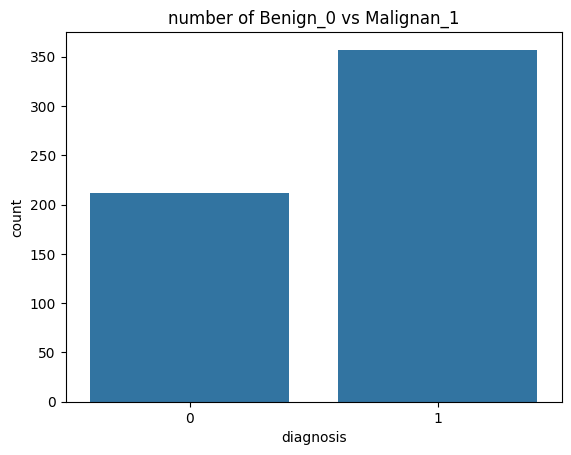

In [8]:
sns.countplot(x='diagnosis',data = df_cancer)
plt.title('number of Benign_0 vs Malignan_1')


<h1>Splitting the Data-Set into Training Set and Test Set</h1>

In [9]:
#define X variables and our target(y)
X = df_cancer.drop(['diagnosis'],axis=1).values # ALTERNATIVE WAY TO CHOOSE DATA AXIS 1 MEANS COLOUMN LABEL 0 MEANS ROW LABEL 
y = df_cancer['diagnosis'].values#split Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

<h1>Just Select the SVM model</h1>

In [10]:
from sklearn.svm import SVC # support vector classification model 
svc_model = SVC()
svc_model.fit(X_train, y_train) # train our model with the given data 

SVC()

<h1>Test our model performance </h1>

<Axes: >

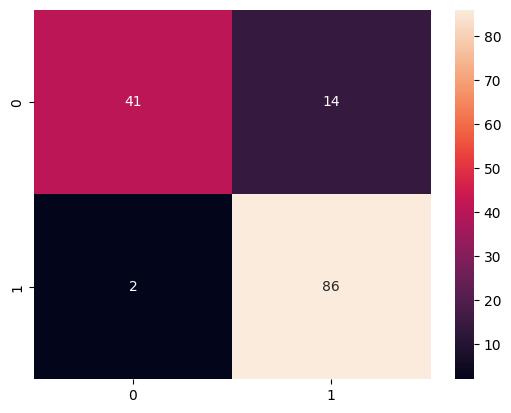

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict = svc_model.predict(X_test) # predict the test data 
cm = confusion_matrix(y_test, y_predict) # check the pridicted value with test data confusion matrix 
sns.heatmap(cm,annot=True) # seaborn used to plot the confusion matrix result 

In [12]:
classficationreport=classification_report(y_test,y_predict)


<img src='breast cancerreport.png' ></img>

<h3>What does the confusion_matrix information result mean?: 0 benign(no) and 1 malagnant(yes) <h3>
<pre>
    We had 143 women in our test set.
    Out of 55 women predicted to not have breast cancer(0), two were classified as not having when actually they had (type one error).
    Out of 88 women predicted to have breast cancer(1), 14 were classified as having breast cancer whey they did not (type two error).
</pre>
<h3>What does this classification report result mean? 
Basically it means that the SVM Model was able to classify tumors into malignant and benign with 89% </h3>


In [13]:

# We have the trained model called svm_model
new_data=[[17.99 ,10.38,2.80,1001.0,0.11840],[12.99 ,5.38,122.80,6.0,0.11840]]

predictions = svc_model.predict(new_data)
predictions


array([0, 1])